In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [94]:
cebu = pd.read_csv(r'CEB Historical Data.csv')
#cebu = pd.read_csv(r'dumdum.csv')
cebu

,Date,Price,Open,High,Low,Vol.,Change %
0,18-Jun-18,80.00,84.50,84.50,79.00,245.62K,-5.33%
1,19-Jun-18,79.50,82.00,82.00,79.00,64.22K,-0.63%
2,20-Jun-18,81.90,81.90,81.90,81.00,23.08K,3.02%
3,21-Jun-18,80.00,81.80,81.80,79.50,121.39K,-2.32%
4,22-Jun-18,79.15,80.05,80.85,79.00,69.46K,-1.06%
...,...,...,...,...,...,...,...
662,8-Mar-21,45.90,45.20,48.10,45.00,666.00K,2.00%
663,9-Mar-21,45.60,45.00,46.00,43.25,300.50K,-0.65%
664,10-Mar-21,46.85,45.60,47.10,44.90,474.90K,2.74%
665,11-Mar-21,47.20,46.85,47.50,46.00,333.50K,0.75%


In [95]:
cebu.rename(columns={'Vol.': 'Volume', 'Change %': 'Change'}, inplace=True)
cebu

,Date,Price,Open,High,Low,Volume,Change
0,18-Jun-18,80.00,84.50,84.50,79.00,245.62K,-5.33%
1,19-Jun-18,79.50,82.00,82.00,79.00,64.22K,-0.63%
2,20-Jun-18,81.90,81.90,81.90,81.00,23.08K,3.02%
3,21-Jun-18,80.00,81.80,81.80,79.50,121.39K,-2.32%
4,22-Jun-18,79.15,80.05,80.85,79.00,69.46K,-1.06%
...,...,...,...,...,...,...,...
662,8-Mar-21,45.90,45.20,48.10,45.00,666.00K,2.00%
663,9-Mar-21,45.60,45.00,46.00,43.25,300.50K,-0.65%
664,10-Mar-21,46.85,45.60,47.10,44.90,474.90K,2.74%
665,11-Mar-21,47.20,46.85,47.50,46.00,333.50K,0.75%


In [96]:
cebu.shape
cebu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    667 non-null    object 
 1   Price   667 non-null    float64
 2   Open    667 non-null    float64
 3   High    667 non-null    float64
 4   Low     667 non-null    float64
 5   Volume  667 non-null    object 
 6   Change  667 non-null    object 
dtypes: float64(4), object(3)
memory usage: 36.6+ KB


In [97]:
cebu['Volume'] = (cebu['Volume'].replace(r'[KM]+$', '', regex=True).astype(float) * \
                  cebu['Volume'].str.extract(r'[\d\.]+([KM]+)', expand=False)
                  .fillna(1)
                  .replace(['K','M'], [10**3, 10**6]).astype(int))

In [98]:
cebu

,Date,Price,Open,High,Low,Volume,Change
0,18-Jun-18,80.00,84.50,84.50,79.00,245620.0,-5.33%
1,19-Jun-18,79.50,82.00,82.00,79.00,64220.0,-0.63%
2,20-Jun-18,81.90,81.90,81.90,81.00,23080.0,3.02%
3,21-Jun-18,80.00,81.80,81.80,79.50,121390.0,-2.32%
4,22-Jun-18,79.15,80.05,80.85,79.00,69460.0,-1.06%
...,...,...,...,...,...,...,...
662,8-Mar-21,45.90,45.20,48.10,45.00,666000.0,2.00%
663,9-Mar-21,45.60,45.00,46.00,43.25,300500.0,-0.65%
664,10-Mar-21,46.85,45.60,47.10,44.90,474900.0,2.74%
665,11-Mar-21,47.20,46.85,47.50,46.00,333500.0,0.75%


In [99]:
cebu['Change'] = cebu['Change'].str.replace('%', '')
cebu['Change'] = cebu['Change'].astype(float)
cebu

,Date,Price,Open,High,Low,Volume,Change
0,18-Jun-18,80.00,84.50,84.50,79.00,245620.0,-5.33
1,19-Jun-18,79.50,82.00,82.00,79.00,64220.0,-0.63
2,20-Jun-18,81.90,81.90,81.90,81.00,23080.0,3.02
3,21-Jun-18,80.00,81.80,81.80,79.50,121390.0,-2.32
4,22-Jun-18,79.15,80.05,80.85,79.00,69460.0,-1.06
...,...,...,...,...,...,...,...
662,8-Mar-21,45.90,45.20,48.10,45.00,666000.0,2.00
663,9-Mar-21,45.60,45.00,46.00,43.25,300500.0,-0.65
664,10-Mar-21,46.85,45.60,47.10,44.90,474900.0,2.74
665,11-Mar-21,47.20,46.85,47.50,46.00,333500.0,0.75


In [100]:
cebu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    667 non-null    object 
 1   Price   667 non-null    float64
 2   Open    667 non-null    float64
 3   High    667 non-null    float64
 4   Low     667 non-null    float64
 5   Volume  667 non-null    float64
 6   Change  667 non-null    float64
dtypes: float64(6), object(1)
memory usage: 36.6+ KB


In [101]:
cebu['Date'] = pd.to_datetime(cebu['Date'])
cebu.set_index('Date', inplace=True)
cebu

,Price,Open,High,Low,Volume,Change
Date,,,,,,
2018-06-18,80.00,84.50,84.50,79.00,245620.0,-5.33
2018-06-19,79.50,82.00,82.00,79.00,64220.0,-0.63
2018-06-20,81.90,81.90,81.90,81.00,23080.0,3.02
2018-06-21,80.00,81.80,81.80,79.50,121390.0,-2.32
2018-06-22,79.15,80.05,80.85,79.00,69460.0,-1.06
...,...,...,...,...,...,...
2021-03-08,45.90,45.20,48.10,45.00,666000.0,2.00
2021-03-09,45.60,45.00,46.00,43.25,300500.0,-0.65
2021-03-10,46.85,45.60,47.10,44.90,474900.0,2.74


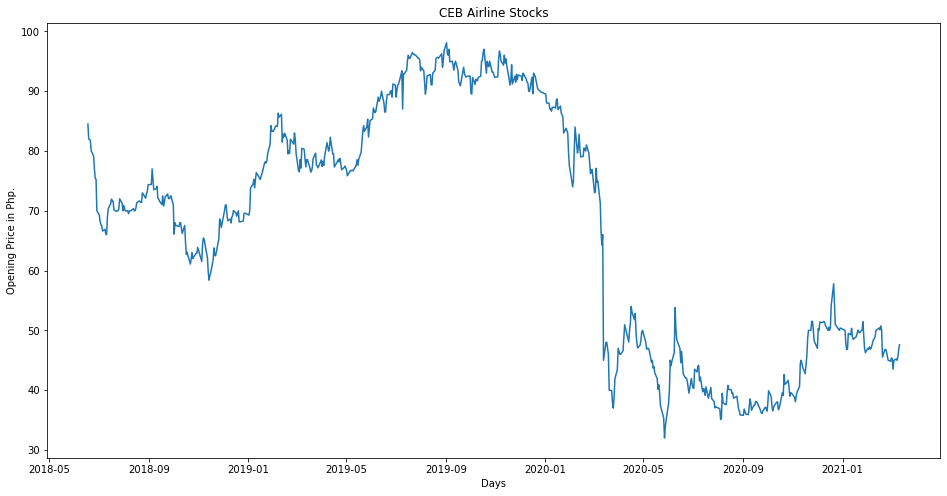

In [102]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('CEB Airline Stocks')
plt.xlabel('Days')
plt.ylabel('Opening Price in Php.')
plt.plot(cebu['Open'])
plt.show()

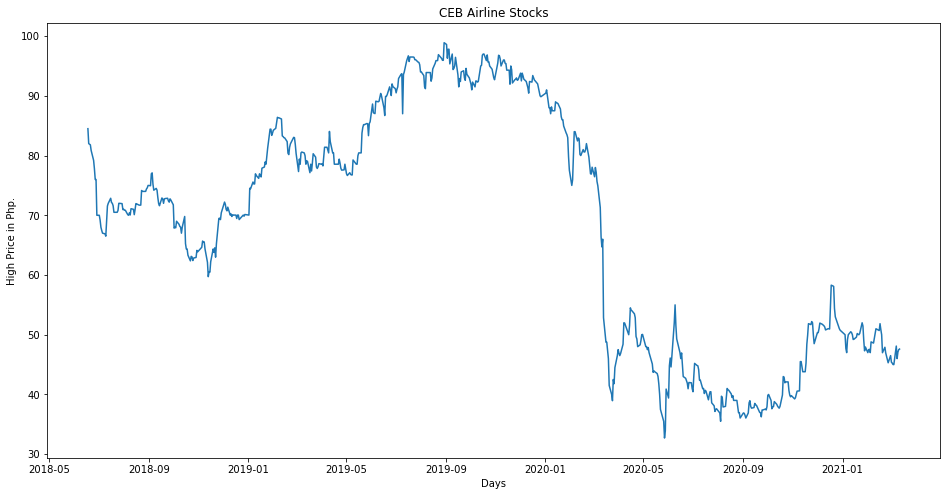

In [103]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('CEB Airline Stocks')
plt.xlabel('Days')
plt.ylabel('High Price in Php.')
plt.plot(cebu['High'])
plt.show()

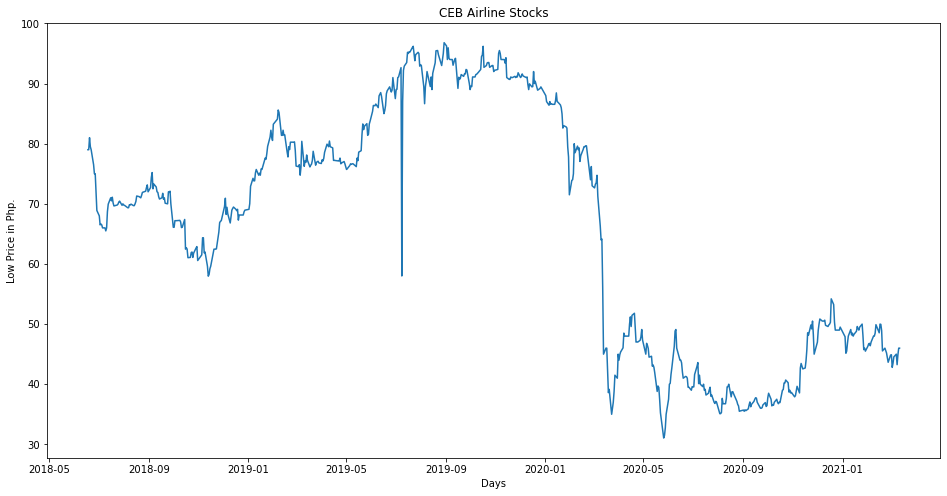

In [104]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('CEB Airline Stocks')
plt.xlabel('Days')
plt.ylabel('Low Price in Php.')
plt.plot(cebu['Low'])
plt.show()

In [105]:
future_days = 10
cebu['PredictedPrice'] = cebu['Price'].shift(-future_days)

In [106]:
cebu.tail(10)

,Price,Open,High,Low,Volume,Change,PredictedPrice
Date,,,,,,,
2021-03-01,45.20,44.85,46.50,44.85,519600.0,0.78,NaN
2021-03-02,45.25,45.40,45.40,44.90,297200.0,0.11,NaN
2021-03-03,43.40,45.25,45.25,42.80,616000.0,-4.09,NaN
2021-03-04,44.55,43.50,45.00,43.50,222200.0,2.65,NaN
2021-03-05,45.00,45.00,45.00,44.55,229900.0,1.01,NaN
2021-03-08,45.90,45.20,48.10,45.00,666000.0,2.00,NaN
2021-03-09,45.60,45.00,46.00,43.25,300500.0,-0.65,NaN
2021-03-10,46.85,45.60,47.10,44.90,474900.0,2.74,NaN
2021-03-11,47.20,46.85,47.50,46.00,333500.0,0.75,NaN


In [107]:
X = np.array(cebu.drop(['PredictedPrice'], 1))[:-future_days]
print(X)

[[ 8.0000e+01  8.4500e+01  8.4500e+01  7.9000e+01  2.4562e+05 -5.3300e+00]
 [ 7.9500e+01  8.2000e+01  8.2000e+01  7.9000e+01  6.4220e+04 -6.3000e-01]
 [ 8.1900e+01  8.1900e+01  8.1900e+01  8.1000e+01  2.3080e+04  3.0200e+00]
 ...
 [ 4.6500e+01  4.6800e+01  4.6950e+01  4.5600e+01  8.3940e+05 -1.6900e+00]
 [ 4.5500e+01  4.6400e+01  4.6400e+01  4.5200e+01  5.7950e+05 -2.1500e+00]
 [ 4.4850e+01  4.5000e+01  4.5300e+01  4.3650e+01  6.9710e+05 -1.4300e+00]]


In [108]:
y = np.array(cebu['PredictedPrice'])[:-future_days]
print(y)

[68.2   66.8   67.45  66.5   66.05  66.    65.6   67.65  70.4   71.
 71.    71.1   71.5   70.15  69.9   70.    70.    70.1   71.5   70.9
 70.    70.35  70.4   69.95  69.95  69.35  69.4   70.    69.95  70.35
 70.    70.    70.3   71.05  71.65  71.4   71.4   72.8   72.    72.65
 73.1   74.35  72.    73.    76.9   75.2   72.5   73.7   74.1   72.
 72.    71.6   71.05  72.    72.    71.5   72.    72.8   72.1   72.
 72.1   72.6   70.    66.1   67.15  67.55  67.3   67.2   67.45  67.5
 67.    66.1   67.    67.8   62.463 62.889 62.463 61.043 61.942 61.895
 61.99  61.091 62.842 62.842 62.889 60.57  64.356 65.444 65.255 64.356
 62.132 59.624 58.11  58.961 59.624 61.753 63.788 62.463 62.463 62.51
 64.356 68.189 68.236 67.1   70.176 69.798 71.454 68.236 69.798 70.649
 68.283 68.946 69.23  69.561 69.466 69.088 69.088 69.987 68.141 68.141
 69.845 69.561 69.277 69.561 74.009 74.293 75.24  73.82  74.956 76.375
 75.713 75.429 75.24  76.091 76.186 76.943 78.079 77.606 78.363 79.498
 81.107 84.183 83.331 

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [111]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [112]:
x_future = cebu.drop(['PredictedPrice'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[ 5.0400e+01,  5.0000e+01,  5.1000e+01,  4.9900e+01,  5.5804e+05,
         8.0000e-01],
       [ 5.0000e+01,  5.0400e+01,  5.0700e+01,  4.8550e+01,  6.6358e+05,
        -7.9000e-01],
       [ 5.0700e+01,  5.0100e+01,  5.1850e+01,  5.0000e+01,  7.9422e+05,
         1.4000e+00],
       [ 5.0100e+01,  5.0750e+01,  5.0850e+01,  4.9950e+01,  4.0617e+05,
        -1.1800e+00],
       [ 4.9500e+01,  5.0000e+01,  5.0000e+01,  4.8900e+01,  1.6800e+06,
        -1.2000e+00],
       [ 4.6800e+01,  4.5536e+01,  4.6987e+01,  4.5536e+01,  1.6500e+06,
        -5.4500e+00],
       [ 4.7300e+01,  4.6800e+01,  4.7900e+01,  4.6000e+01,  9.4463e+05,
         1.0700e+00],
       [ 4.6500e+01,  4.6800e+01,  4.6950e+01,  4.5600e+01,  8.3940e+05,
        -1.6900e+00],
       [ 4.5500e+01,  4.6400e+01,  4.6400e+01,  4.5200e+01,  5.7950e+05,
        -2.1500e+00],
       [ 4.4850e+01,  4.5000e+01,  4.5300e+01,  4.3650e+01,  6.9710e+05,
        -1.4300e+00]])

In [113]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[45.2  45.25 43.4  44.55 49.6  45.9  45.6  46.85 47.2  46.5 ]


In [114]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[50.72046294 49.64445153 51.72868858 50.26875995 51.30950413 46.76589733
 47.79914088 46.57455419 45.90298659 44.53535995]


In [115]:
predictions = tree_prediction 
valid = cebu[X.shape[0]:]
valid['Prediction'] = predictions

<ipython-input-115-dce666d0400e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


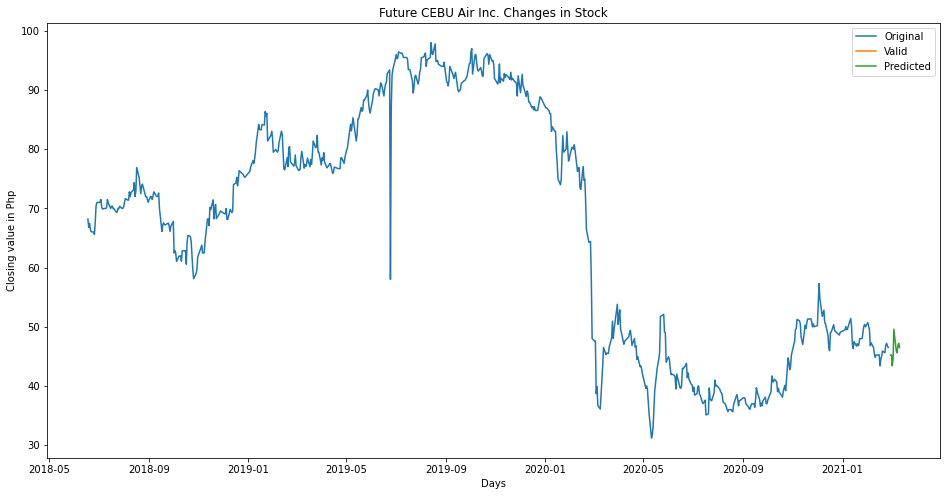

In [116]:
plt.figure(figsize=(16,8))
plt.title("Future CEBU Air Inc. Changes in Stock")
plt.xlabel('Days')
plt.ylabel('Closing value in Php')
plt.plot(cebu['PredictedPrice'])
plt.plot(valid[['PredictedPrice', 'Prediction']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()